In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
data.shape

(200, 5)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [61]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [62]:
data = data.drop_duplicates()
data.shape

(200, 5)

## So no null values and no duplicates are present in data

In [63]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## one hot encoding via pd.get_dummy on gender column as rank is not important and drop one column via drop_first..

In [64]:
dummy_gender = pd.get_dummies(data['Gender'],drop_first=True,prefix='gender')
dummy_gender

,gender_Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [0]:
data.drop(['Gender'],1,inplace=True)

In [66]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [67]:
data = data.join(dummy_gender,lsuffix='Age')
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [0]:
data.drop(['CustomerID'],1,inplace=True)

In [69]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [0]:
from sklearn.cluster import KMeans

## plotting a elbow graph through which we will get to know that what should be the value for k

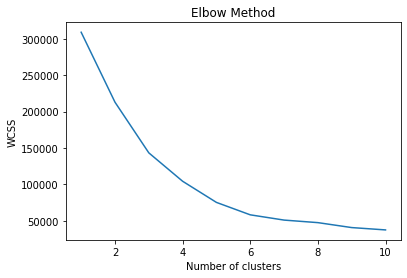

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## We get k as 5

In [72]:
km = KMeans(n_clusters=5,init='k-means++',n_init=8,max_iter=300, random_state=0)
print(km.fit(data))
y_kmeans= km.fit_predict(data)
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=8, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [73]:
data['label'] = y_kmeans
data.head()

,Age,Annual Income (k$),Spending Score (1-100),gender_Male,label
0,19,15,39,1,3
1,21,15,81,1,2
2,20,16,6,0,3
3,23,16,77,0,2
4,31,17,40,0,3


## Importing library for plotting 3d graphs

In [0]:
from mpl_toolkits.mplot3d import Axes3D as ax

In [19]:
data.label.value_counts()

0    77
1    39
4    36
2    25
3    23
Name: label, dtype: int64

## Considering 2 columns/features as X1 and ploting its 2d graph to understand the relation. Here too we will find the k value

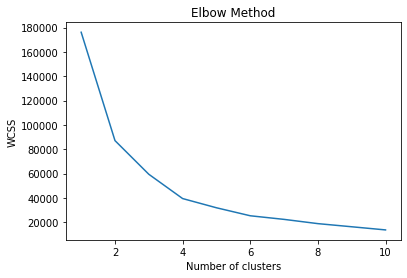

In [20]:
X1 = data[['Age','Annual Income (k$)']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## we get k=4

In [23]:
km1 = KMeans(n_clusters=4,init='k-means++',n_init=8,max_iter=300, random_state=0)
print(km1.fit(X1))
y_kmeans1= km.fit_predict(data)
y_kmeans1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=8, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [24]:
X1['label1'] = y_kmeans1
X1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Annual Income (k$),label1
0,19,15,4
1,21,15,2
2,20,16,4
3,23,16,2
4,31,17,4


In [0]:
# X1[X1['label1']==0]

## Below is scatter plot of age and annual income, finding its relation

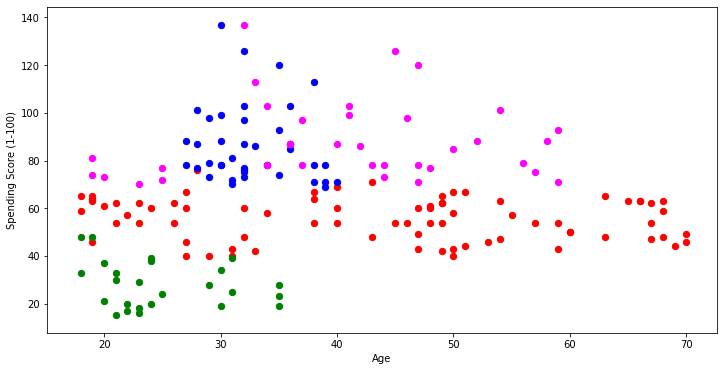

In [28]:
fig = plt.figure(figsize=(12,6))
plt.scatter(X1.Age[X1.label1==0], X1['Annual Income (k$)'][X1.label1==0], s=40, c='red')
plt.scatter(X1.Age[X1.label1==1], X1['Annual Income (k$)'][X1.label1==1], s=40, c='blue')
plt.scatter(X1.Age[X1.label1==2], X1['Annual Income (k$)'][X1.label1==2], s=40, c='green')
plt.scatter(X1.Age[X1.label1==3], X1['Annual Income (k$)'][X1.label1==3], s=40, c='magenta')
plt.xlabel("Age")
plt.ylabel('Spending Score (1-100)')
plt.show()

## Finding another relation with 2 different features as X2

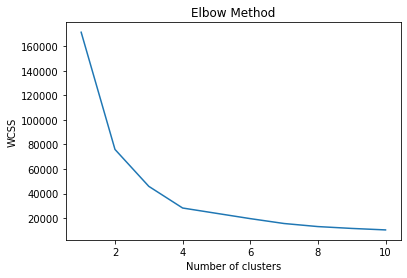

In [29]:
X2 = data[['Age','Spending Score (1-100)']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
km2 = KMeans(n_clusters=4,init='k-means++',n_init=8,max_iter=300, random_state=0)
print(km1.fit(X2))
y_kmeans2 = km2.fit_predict(X2)
print(y_kmeans2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=8, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
[0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 0 2 1 0 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2
 1 2 1 3 1 3 0 2 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 0 1 3 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [31]:
X2['label2'] = y_kmeans2
X2.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Spending Score (1-100),label2
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0


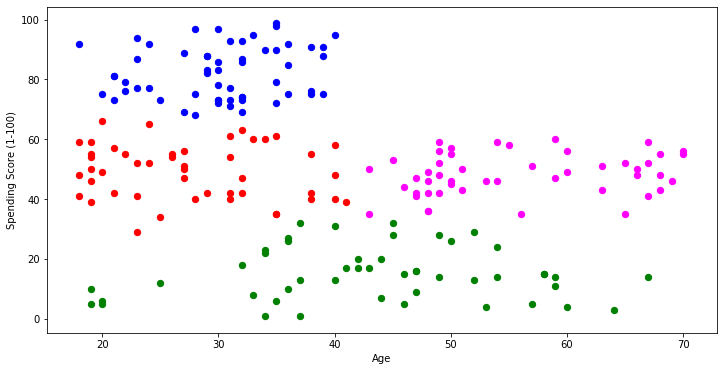

In [32]:
fig = plt.figure(figsize=(12,6))
plt.scatter(X2.Age[X2.label2==0], X2['Spending Score (1-100)'][X2.label2==0], s=40, c='red')
plt.scatter(X2.Age[X2.label2==1], X2['Spending Score (1-100)'][X2.label2==1], s=40, c='blue')
plt.scatter(X2.Age[X2.label2==2], X2['Spending Score (1-100)'][X2.label2==2], s=40, c='green')
plt.scatter(X2.Age[X2.label2==3], X2['Spending Score (1-100)'][X2.label2==3], s=40, c='magenta')
plt.xlabel("Age")
plt.ylabel('Spending Score (1-100)')
plt.show()

## plotting relation between age,annual income and spending score

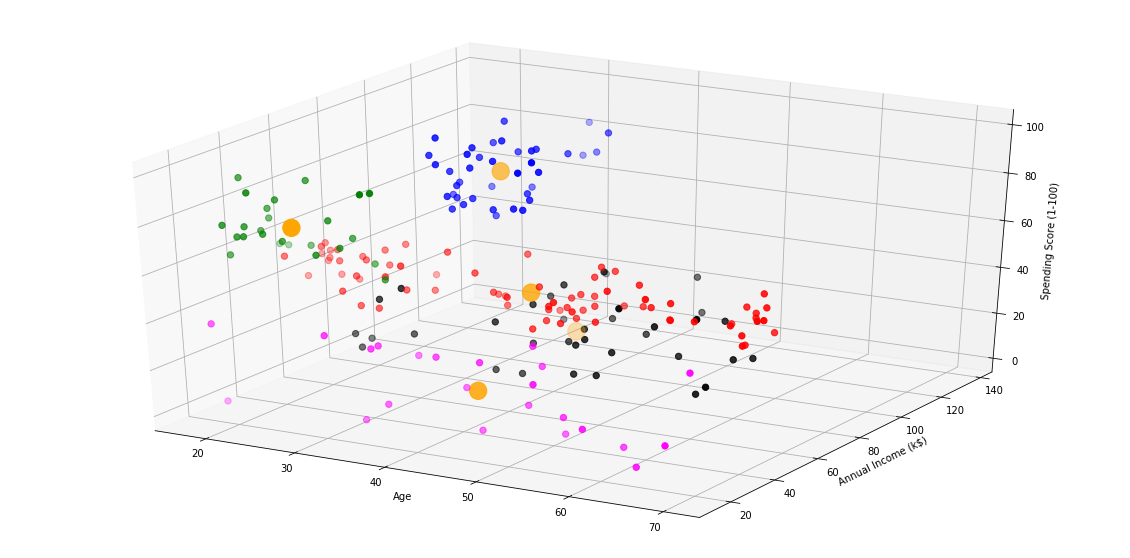

In [35]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, projection='3d')    # write as 111 or 1,1,1 result will bw same. it helps to change the size of graph..
ax.scatter(data.Age[data.label==0], data['Annual Income (k$)'][data.label==0], data['Spending Score (1-100)'][data.label==0], s=40, c='red')
ax.scatter(data.Age[data.label==1], data['Annual Income (k$)'][data.label==1], data['Spending Score (1-100)'][data.label==1], s=40, c='blue')
ax.scatter(data.Age[data.label==2], data['Annual Income (k$)'][data.label==2], data['Spending Score (1-100)'][data.label==2], s=40, c='green')
ax.scatter(data.Age[data.label==3], data['Annual Income (k$)'][data.label==3], data['Spending Score (1-100)'][data.label==3], s=40, c='magenta')
ax.scatter(data.Age[data.label==4], data['Annual Income (k$)'][data.label==4], data['Spending Score (1-100)'][data.label==4], s=40, c='black')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:,2], s = 300, c = 'orange', label = 'Centroids')
ax.view_init(30, 300)    # this rotates the 3d graph with an angle of 300 degree
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

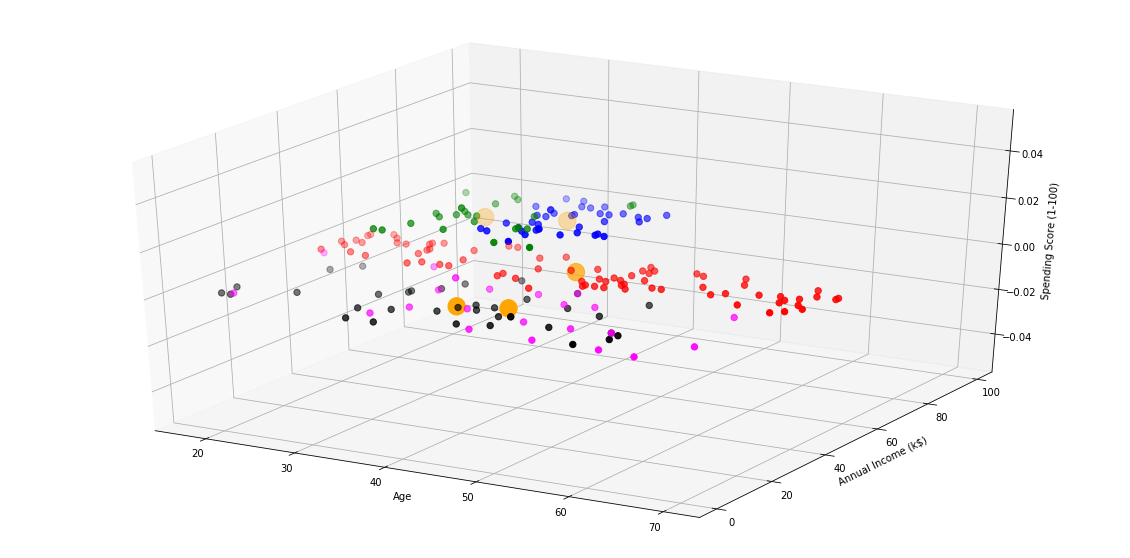

In [37]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, projection='3d')    # write as 111 or 1,1,1 result will bw same. it helps to change the size of graph..
ax.scatter(data.Age[data.label==0], data['Spending Score (1-100)'][data.label==0], s=40, c='red')
ax.scatter(data.Age[data.label==1], data['Spending Score (1-100)'][data.label==1], s=40, c='blue')
ax.scatter(data.Age[data.label==2], data['Spending Score (1-100)'][data.label==2], s=40, c='green')
ax.scatter(data.Age[data.label==3], data['Spending Score (1-100)'][data.label==3], s=40, c='magenta')
ax.scatter(data.Age[data.label==4], data['Spending Score (1-100)'][data.label==4], s=40, c='black')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,2], s = 300, c = 'orange', label = 'Centroids')
ax.view_init(30, 300)    # this rotates the 3d graph with an angle of 300 degree
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


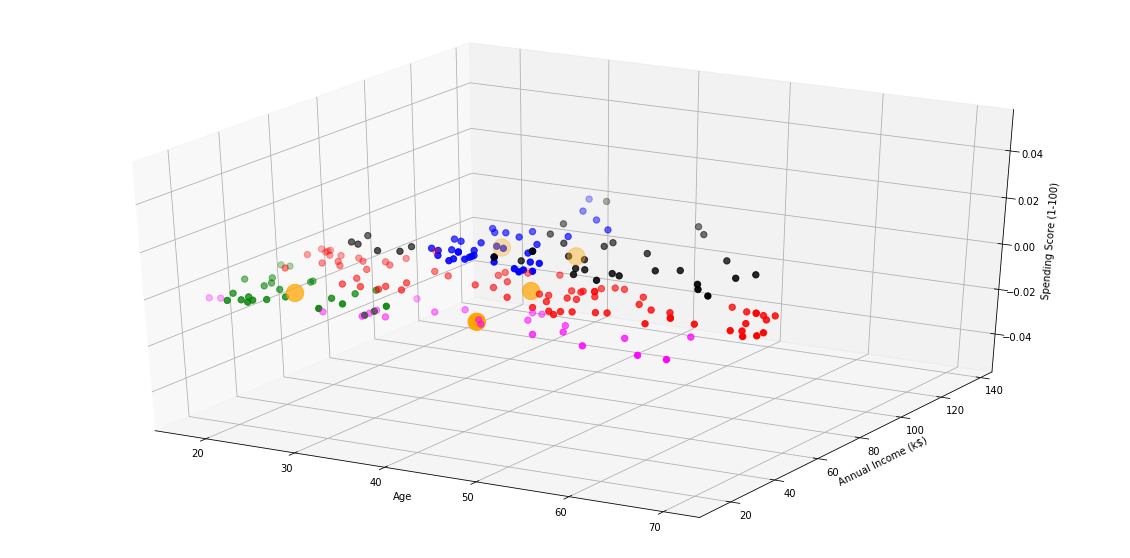

In [38]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, projection='3d')    # write as 111 or 1,1,1 result will bw same. it helps to change the size of graph..
ax.scatter(data.Age[data.label==0], data['Annual Income (k$)'][data.label==0], s=40, c='red')
ax.scatter(data.Age[data.label==1], data['Annual Income (k$)'][data.label==1], s=40, c='blue')
ax.scatter(data.Age[data.label==2], data['Annual Income (k$)'][data.label==2], s=40, c='green')
ax.scatter(data.Age[data.label==3], data['Annual Income (k$)'][data.label==3], s=40, c='magenta')
ax.scatter(data.Age[data.label==4], data['Annual Income (k$)'][data.label==4], s=40, c='black')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 300, c = 'orange', label = 'Centroids')
ax.view_init(30, 300)    # this rotates the 3d graph with an angle of 300 degree
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


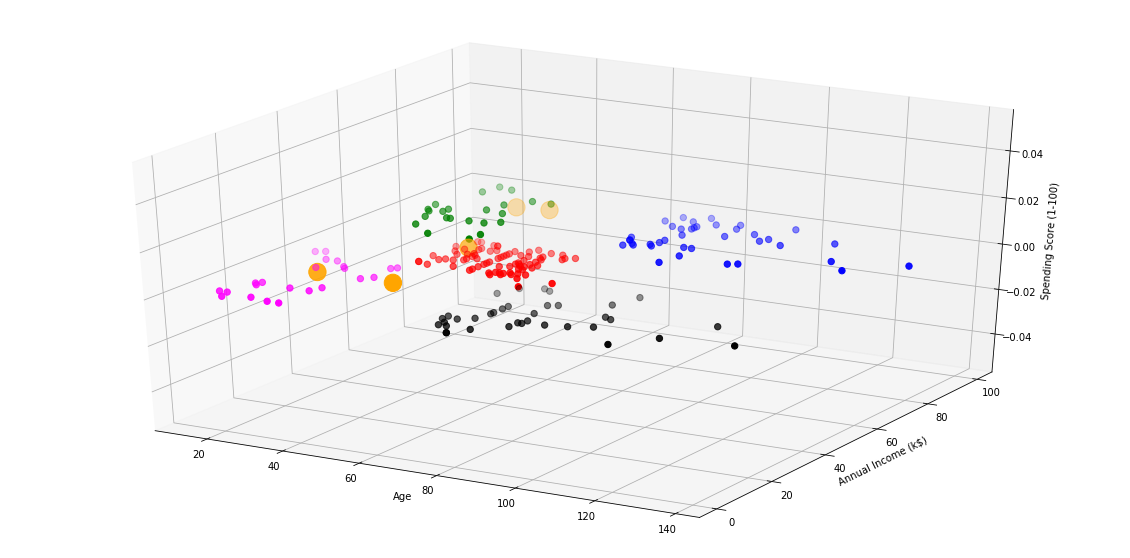

In [0]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, projection='3d')    # write as 111 or 1,1,1 result will bw same. it helps to change the size of graph..
ax.scatter(data['Annual Income (k$)'][data.label==0], data['Spending Score (1-100)'][data.label==0], s=40, c='red')
ax.scatter(data['Annual Income (k$)'][data.label==1], data['Spending Score (1-100)'][data.label==1], s=40, c='blue')
ax.scatter(data['Annual Income (k$)'][data.label==2], data['Spending Score (1-100)'][data.label==2], s=40, c='green')
ax.scatter(data['Annual Income (k$)'][data.label==3], data['Spending Score (1-100)'][data.label==3], s=40, c='magenta')
ax.scatter(data['Annual Income (k$)'][data.label==4], data['Spending Score (1-100)'][data.label==4], s=40, c='black')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 300, c = 'orange', label = 'Centroids')
ax.view_init(30, 300)    # this rotates the 3d graph with an angle of 300 degree
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

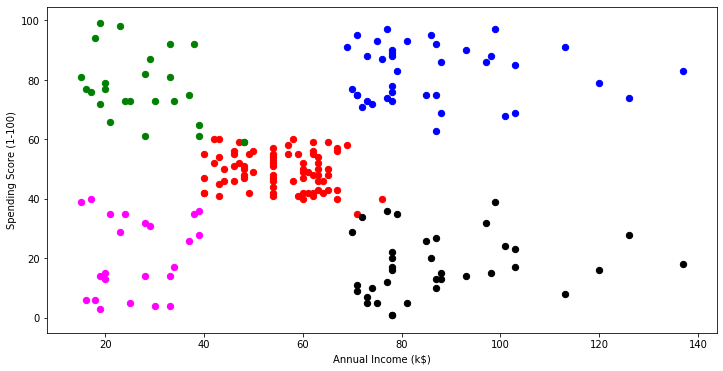

In [74]:
fig = plt.figure(figsize=(12,6))
# ax = fig.add_subplot(1,1,1, projection='3d')    # write as 111 or 1,1,1 result will bw same. it helps to change the size of graph..
plt.scatter(data['Annual Income (k$)'][data.label==0], data['Spending Score (1-100)'][data.label==0], s=40, c='red')
plt.scatter(data['Annual Income (k$)'][data.label==1], data['Spending Score (1-100)'][data.label==1], s=40, c='blue')
plt.scatter(data['Annual Income (k$)'][data.label==2], data['Spending Score (1-100)'][data.label==2], s=40, c='green')
plt.scatter(data['Annual Income (k$)'][data.label==3], data['Spending Score (1-100)'][data.label==3], s=40, c='magenta')
plt.scatter(data['Annual Income (k$)'][data.label==4], data['Spending Score (1-100)'][data.label==4], s=40, c='black')
# plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 300, c = 'orange', label = 'Centroids')
# ax.view_init(30, 300)    # this rotates the 3d graph with an angle of 300 degree
# plt.xlabel("Age")
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()

## IN ABOVE 2 GRAPHS(3D & 2D) GRAPH:
## Annual income of $20k-$40k has very high spending score(green), so companies can target them for loans as they are taking loan for spending high.
## Annual income of $20k-$40k has less spending score(magenta), so companies can target them for investments.
## companies will traget more to black cluster as thier income is high but spending is less so companies will try to attract them with their different products.
## Comapnies will not give more attention to the blue clustered people as both are high and ofcourse no calls for loan. 

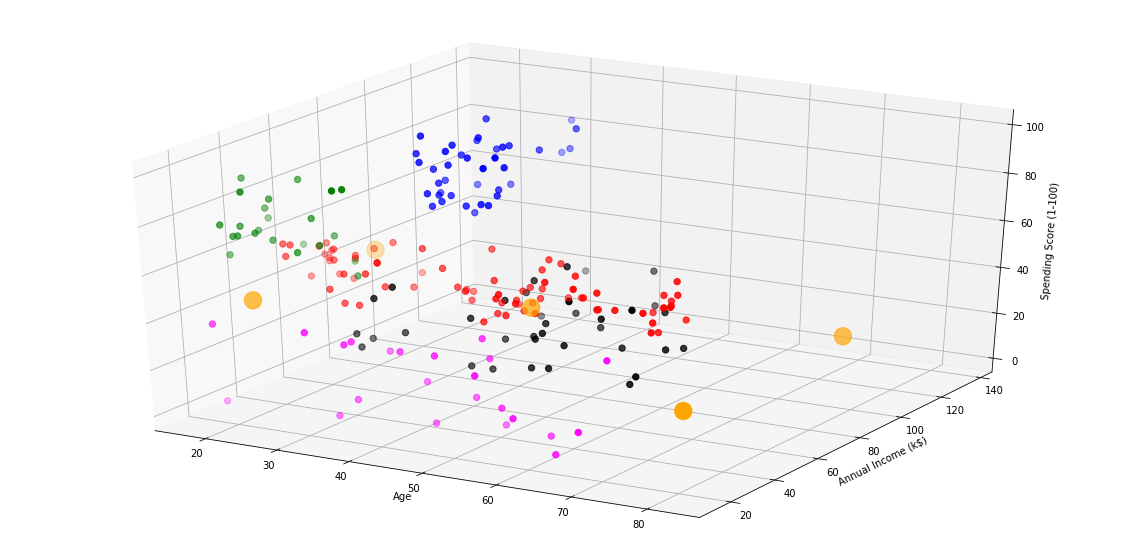

In [0]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, projection='3d')    # write as 111 or 1,1,1 result will bw same. it helps to change the size of graph..
ax.scatter(data.Age[data.label==0], data['Annual Income (k$)'][data.label==0], data['Spending Score (1-100)'][data.label==0], s=40, c='red')
ax.scatter(data.Age[data.label==1], data['Annual Income (k$)'][data.label==1], data['Spending Score (1-100)'][data.label==1], s=40, c='blue')
ax.scatter(data.Age[data.label==2], data['Annual Income (k$)'][data.label==2], data['Spending Score (1-100)'][data.label==2], s=40, c='green')
ax.scatter(data.Age[data.label==3], data['Annual Income (k$)'][data.label==3], data['Spending Score (1-100)'][data.label==3], s=40, c='magenta')
ax.scatter(data.Age[data.label==4], data['Annual Income (k$)'][data.label==4], data['Spending Score (1-100)'][data.label==4], s=40, c='black')
ax.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 1], km.cluster_centers_[:,0], s = 300, c = 'orange', label = 'Centroids')
ax.view_init(30, 300)    # this rotates the 3d graph with an angle of 300 degree
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## IN ABOVE GRAPHS I HAVE TRIED TO PLOT SCATTER PLOTS AGAINST DIFFERENT FEATURES VIA 3D

In [0]:
kmeans.cluster_centers_[:,0]


array([41.91666667, 32.86206897, 28.        , 56.15555556, 51.23076923,
       27.04761905, 24.85      , 32.2       , 41.        , 32.625     ])

In [0]:
kmeans.cluster_centers_[:, 1]

array([ 80.        ,  78.55172414,  46.6       ,  53.37777778,
        26.23076923,  64.71428571,  24.95      , 109.7       ,
       109.7       ,  23.375     ])

In [0]:
kmeans.cluster_centers_[:]

array([[ 41.91666667,  80.        ,  14.58333333,   0.66666667],
       [ 32.86206897,  78.55172414,  82.17241379,   0.48275862],
       [ 28.        ,  46.6       ,  54.2       ,   0.4       ],
       [ 56.15555556,  53.37777778,  49.08888889,   0.44444444],
       [ 51.23076923,  26.23076923,  12.76923077,   0.46153846],
       [ 27.04761905,  64.71428571,  44.95238095,   0.33333333],
       [ 24.85      ,  24.95      ,  81.        ,   0.4       ],
       [ 32.2       , 109.7       ,  82.        ,   0.4       ],
       [ 41.        , 109.7       ,  22.        ,   0.3       ],
       [ 32.625     ,  23.375     ,  30.5       ,   0.25      ]])

In [0]:
final_data = data
final_data.head()

,Age,Annual Income (k$),Spending Score (1-100),gender_Male,label
0,19,15,39,1,3
1,21,15,81,1,2
2,20,16,6,0,3
3,23,16,77,0,2
4,31,17,40,0,3


## Now we can perform supervised Machine Learning and apply different classification models.